In [37]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
import matplotlib.animation as animation

In [38]:
def System(t,r0,g=9.81):
    
    x,y,vx,vy = r0
    ax = 0.
    ay = -g
    
    return np.array([vx,vy,ax,ay])

In [39]:
def trayectoria(theta,x=0.,y=0.,v0=40.):
    alpha = np.deg2rad(theta)
    r0 = np.array([x,y,v0*np.cos(alpha),v0*np.sin(alpha)])

    t = np.linspace(0,6,100)

    solution = solve_ivp(System,(t[0],t[-1]),r0,t_eval=t,method='RK45')

    return solution

In [40]:
def buscar_theta(x,y,x0=0,y0=0,v0=40):
    thetaUP = 90
    thetaDOWN = 40
    for i in range(1000):
        antiUP = trayectoria(thetaUP,x0,y0,v0)
        antiUPx = antiUP.y[0]
        antiUPy = antiUP.y[1]
        antiDOWN = trayectoria(thetaDOWN,x0,y0,v0)
        antiDOWNx = antiDOWN.y[0]
        antiDOWNy = antiDOWN.y[1]
        diffUParr = np.square(antiUPy-y)+np.square(antiUPx-x)
        diffUP = np.min(diffUParr)
        diffDOWNarr = np.square(antiDOWNy-y)+np.square(antiDOWNx-x)
        diffDOWN = np.min(diffDOWNarr)
        if diffUP < 0.5:
            return thetaUP
        if diffDOWN < 0.5:
            return thetaDOWN
        dtheta = np.abs(thetaUP-thetaDOWN)
        if diffUP < diffDOWN:
            yUP = np.where(diffUP == diffUParr)[0][0]
            if y[yUP] < antiUP.y[1][yUP]:
                thetaDOWN += dtheta/2
            else:
                thetaDOWN = thetaUP
                thetaUP += dtheta
        else:
            yDOWN = np.where(diffDOWN == diffDOWNarr)[0][0]
            if y[yDOWN] < antiDOWN.y[1][yDOWN]:
                thetaUP = thetaDOWN
                thetaDOWN -= dtheta
            else:
                thetaUP -= dtheta/2
    return 0

In [41]:
def buscarV(x,y,x0=0,y0=0):
    vUP = 80
    vDOWN = 40
    for i in range(50):
        print(i)
        theta1 = buscar_theta(x,y,x0,y0,vUP)
        if theta1 != 0:
            return vUP,theta1
        theta2 = buscar_theta(x,y,x0,y0,vDOWN)
        if theta2 != 0:
            return vDOWN,theta2
        antiUP = trayectoria(theta1,x0,y0,vUP)
        antiUPx = antiUP.y[0]
        antiUPy = antiUP.y[1]  
        antiDOWN = trayectoria(theta2,x0,y0,vDOWN)
        antiDOWNx = antiDOWN.y[0]
        antiDOWNy = antiDOWN.y[1]
        diffUParr = np.square(antiUPy-y)+np.square(antiUPx-x)
        diffUP = np.min(diffUParr)
        diffDOWNarr = np.square(antiDOWNy-y)+np.square(antiDOWNx-x)
        diffDOWN = np.min(diffDOWNarr)
        if diffUP < 0.5:
            return vUP,theta1
        if diffDOWN < 0.5:
            return vDOWN,theta2
        dv = np.abs(vUP-vDOWN)
        if diffUP < diffDOWN:
            vDOWN = vUP
            vUP += dv
        else:
            vUP = vDOWN
            vDOWN -= dv
    return vUP,theta1

In [42]:
def update(frame):
    line1.set_data(x[:frame+1], y[:frame+1])
    line2.set_data(xAnti[:frame+1], yAnti[:frame+1])
    return line1, line2

In [43]:
misil = trayectoria(160,150,0,80)
t = misil.t
x = misil.y[0]
y = misil.y[1]

In [44]:
v,theta = buscarV(x,y,0,0)
res = trayectoria(theta,0,0,v)
yAnti = res.y[1]
xAnti = res.y[0]

0
1
2
3
4
5


In [45]:
i = np.where((np.square(x-xAnti)+np.square(y-yAnti))<0.5)
if i:
    i = i[0][0]
    imax = len(x)-1
    ires = imax-i
    y = np.append(y[:i],[y[i]]*ires)
    x = np.append(x[:i],[x[i]]*ires)
    yAnti = np.append(yAnti[:i],[yAnti[i]]*ires)
    xAnti = np.append(xAnti[:i],[xAnti[i]]*ires)
else:
    print('No impacto')

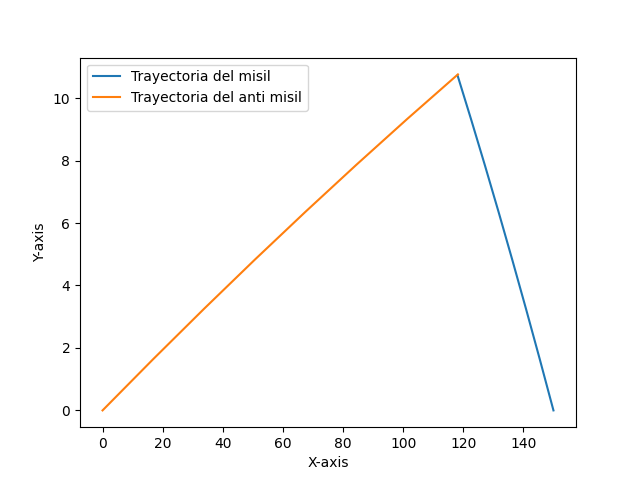

In [46]:
fig, ax = plt.subplots()
line1, = ax.plot(x, y, label='Trayectoria del misil')
line2, = ax.plot(xAnti, yAnti, label='Trayectoria del anti misil')

ax.legend()

ani = animation.FuncAnimation(fig, update, frames=len(x), interval=400, blit=True)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()